<a href="https://colab.research.google.com/github/olkaand/uczenie_maszynowe/blob/use_case1/Case1dom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Pakiety**

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


##**Dane**

In [54]:
from google.colab import files

In [55]:
uploaded = files.upload()

Saving case1.csv to case1 (7).csv


### **Wczytanie i wyświetlenie danych**

In [56]:
df = pd.read_csv('case1.csv', sep=';', on_bad_lines='skip')
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [58]:
liczba_wierszy = df.shape[0]

# Wyświetlenie liczby wierszy
print("Liczba wierszy w całym pliku:", liczba_wierszy)

Liczba wierszy w całym pliku: 9841


### **Sprawdzenie pustych wartości**

In [59]:
# Sprawdzenie, czy są puste wartości w ramce danych
empty = df.isna()

# Obliczenie liczby pustych wartości w każdej kolumnie
empty_sum = empty.sum()

# Wyświetlenie liczby pustych wartości w poszczególnych kolumnach
print(empty_sum)

Unnamed: 0                                                0
Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                            

Czyli mamy ok 830 pustych wartości w blisko połowie zmiennych w 9841 wierszach

In [60]:
# Obliczenie procentowego udziału brakujących danych w każdej kolumnie
procent_brakujacych = (df.isna().mean()) * 100

# Wyświetlenie procentowego udziału brakujących danych
print("Procentowy udział brakujących danych w poszczególnych kolumnach:")
#print(procent_brakujacych.round(2), '%%')

for column_name, value in procent_brakujacych.items():
    print("'{}': {:.2f}%".format(column_name, value))


Procentowy udział brakujących danych w poszczególnych kolumnach:
'Unnamed: 0': 0.00%
'Index': 0.00%
'Address': 0.00%
'FLAG': 0.00%
'Avg min between sent tnx': 0.00%
'Avg min between received tnx': 0.00%
'Time Diff between first and last (Mins)': 0.00%
'Sent tnx': 0.00%
'Received Tnx': 0.00%
'Number of Created Contracts': 0.00%
'Unique Received From Addresses': 0.00%
'Unique Sent To Addresses': 0.00%
'min value received': 0.00%
'max value received ': 0.00%
'avg val received': 0.00%
'min val sent': 0.00%
'max val sent': 0.00%
'avg val sent': 0.00%
'min value sent to contract': 0.00%
'max val sent to contract': 0.00%
'avg value sent to contract': 0.00%
'total transactions (including tnx to create contract': 0.00%
'total Ether sent': 0.00%
'total ether received': 0.00%
'total ether sent contracts': 0.00%
'total ether balance': 0.00%
'Total ERC20 tnxs': 8.42%
'ERC20 total Ether received': 8.42%
'ERC20 total ether sent': 8.42%
'ERC20 total Ether sent contract': 8.42%
'ERC20 uniq sent addr': 

### Usunięcie zmiennych adres i unnamed

In [61]:
df= df.drop('Address',  axis=1)
df.head()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


Dodatkowo usunę unnamed: 0

In [62]:
df = df.drop('Unnamed: 0', axis=1)

In [63]:
df.head()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### Histogram

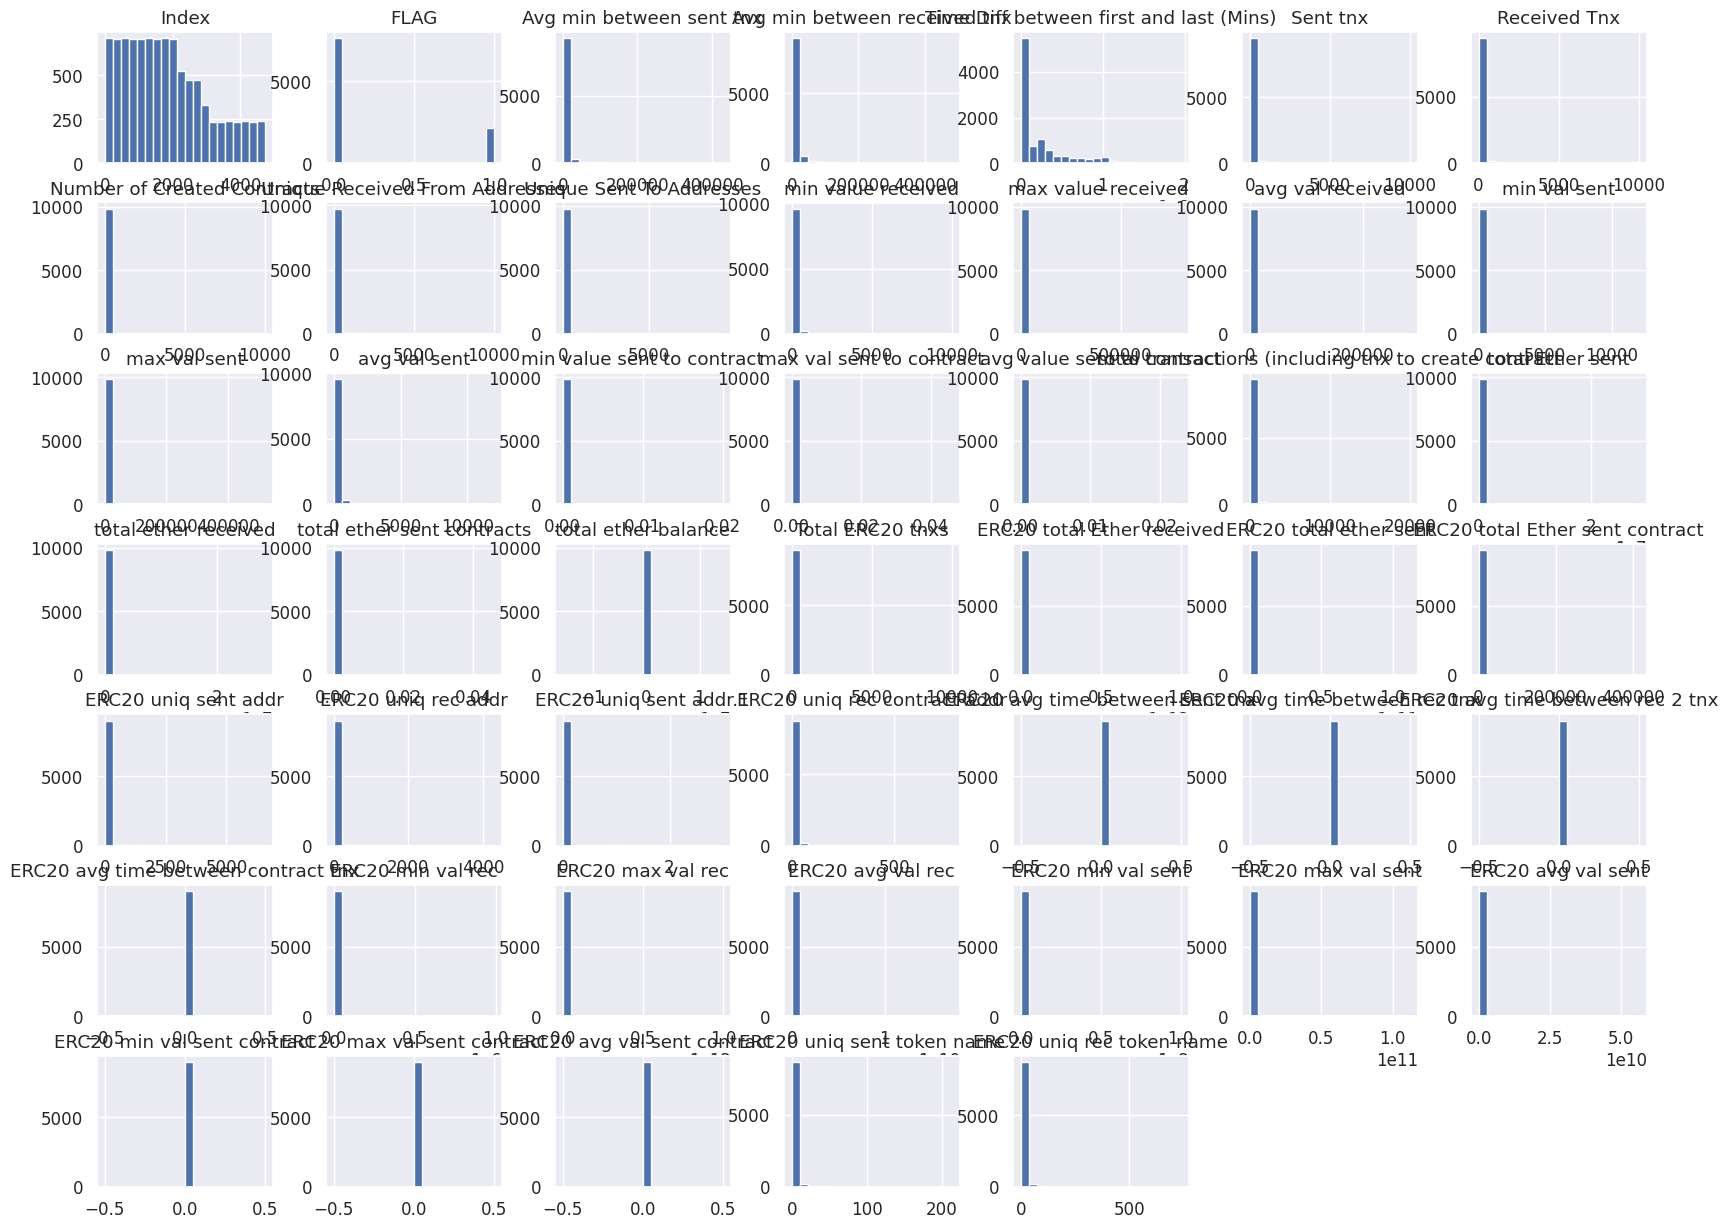

In [64]:
df.hist(bins = 20, figsize = (20, 15))
plt.show()

### **Sprawdzenie wartości odstających**

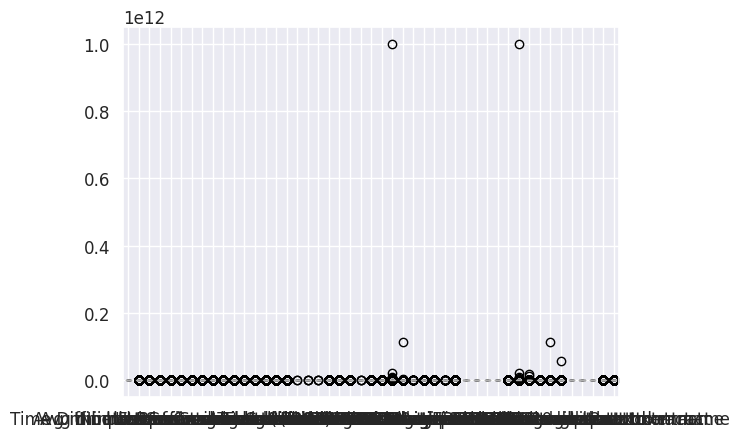

In [65]:
df.boxplot()
plt.show()

#### Wykresy podełkowe dla zmiennych

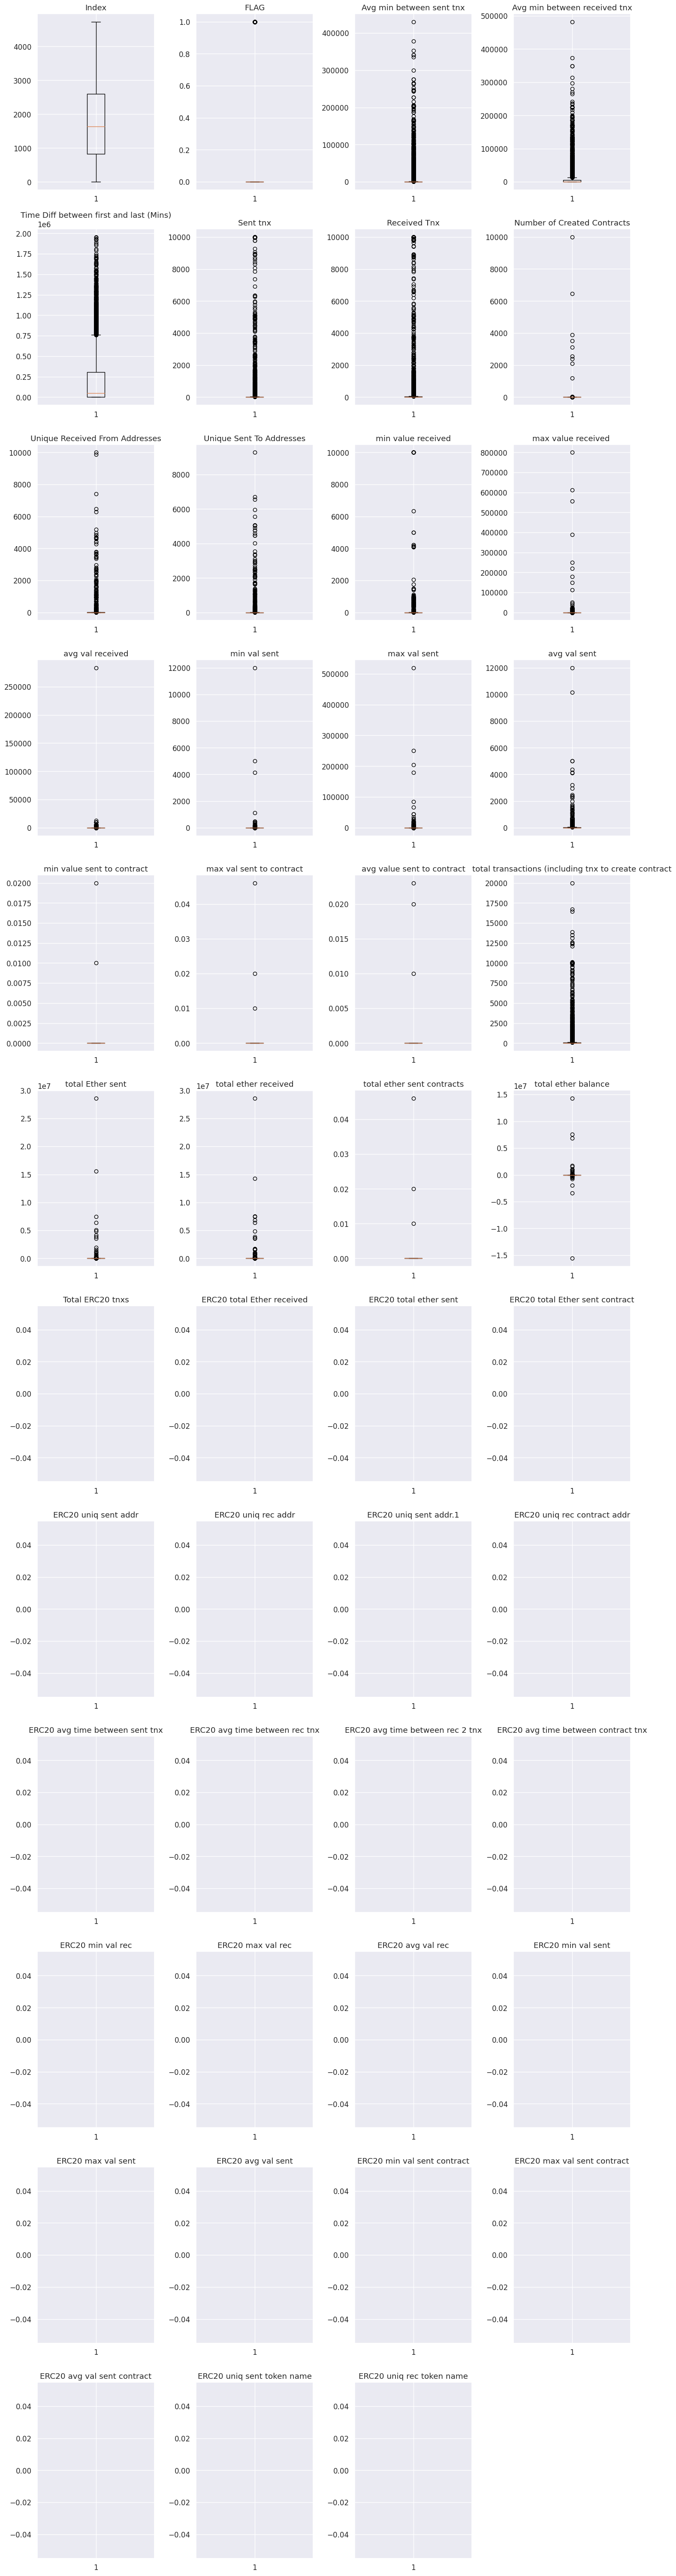

In [66]:
# ile kolumn w rzędzie
num_cols = 4

num_rows = (len(df.columns) + num_cols - 1) // num_cols

# wysokość podwykresu
subplot_height = 5

# Oblicz wysokość całej figury
figure_height = subplot_height * num_rows

plt.figure(figsize=(15, figure_height))

for i, column in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(num_rows, num_cols, i + 1)

        # Wykres pudełkowy z zaznaczonymi wartościami odstającymi
        plt.boxplot(df[column], showfliers=True)

        plt.title(column)

plt.tight_layout()
plt.show()

### Usunięcie wartości pustych

In [67]:
df = df.dropna()
df.head()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


Wykres pudełkowy po usunięciu wartości pustych

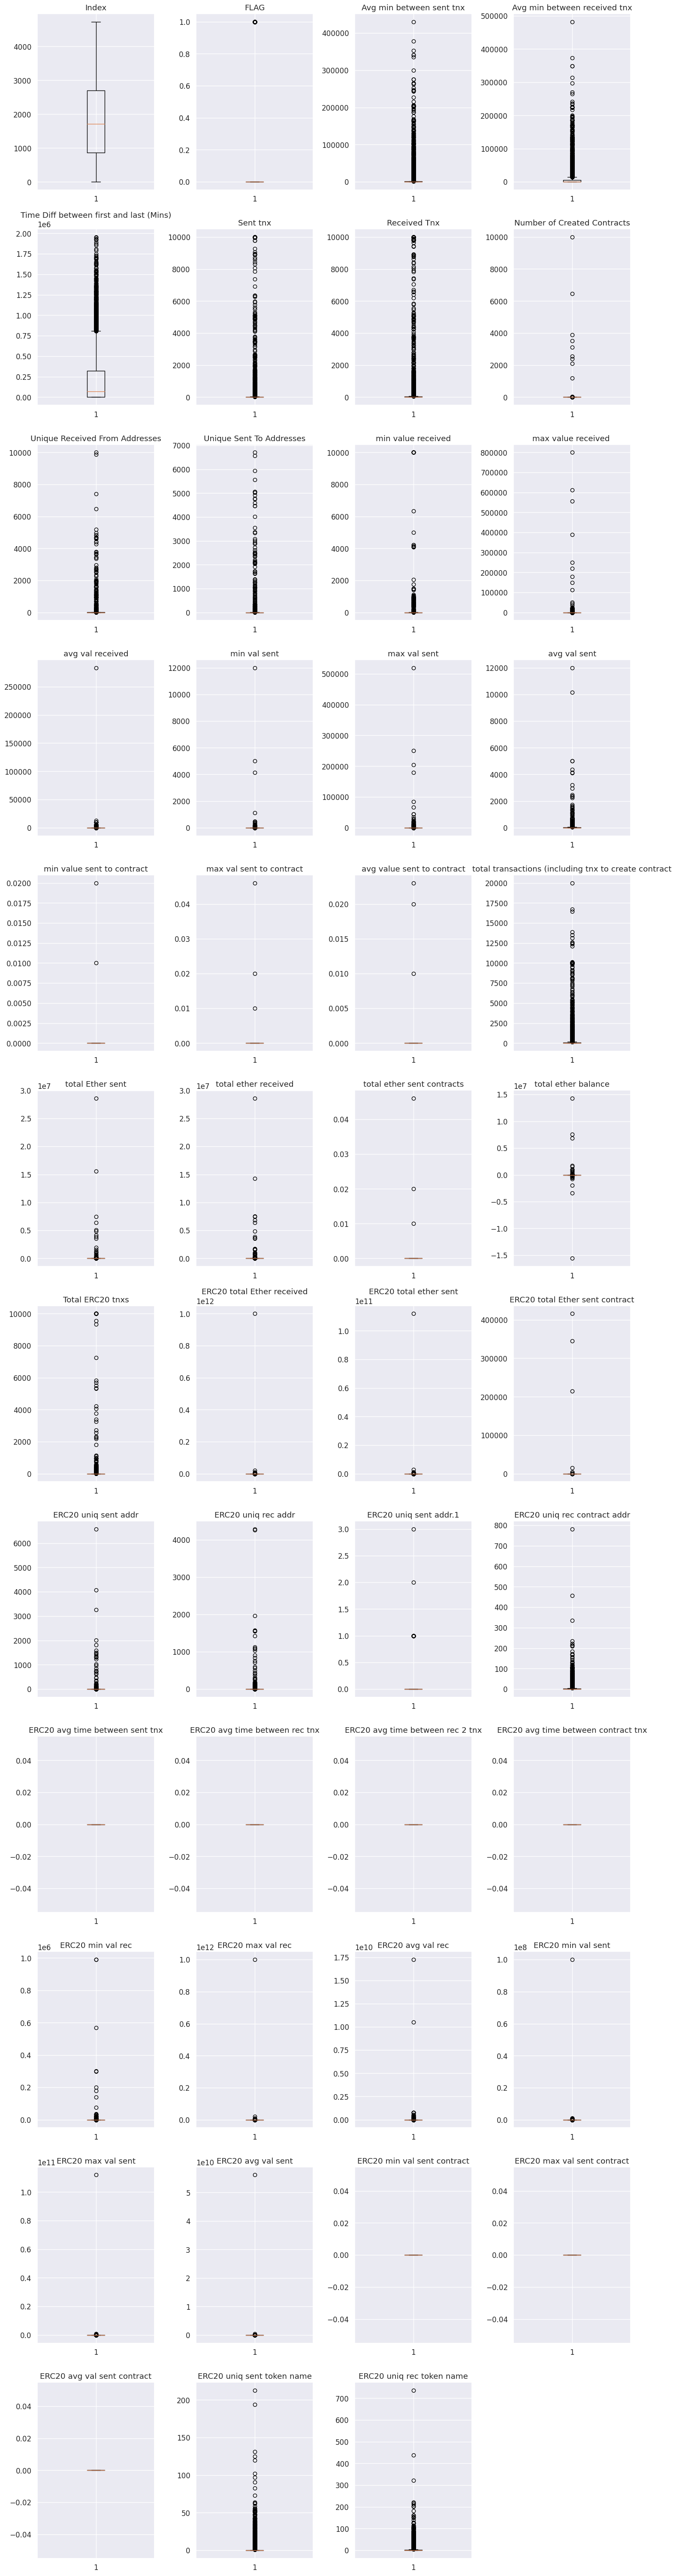

In [68]:
# ile kolumn w rzędzie
num_cols = 4

num_rows = (len(df.columns) + num_cols - 1) // num_cols

# wysokość podwykresu
subplot_height = 5

# Oblicz wysokość całej figury
figure_height = subplot_height * num_rows

plt.figure(figsize=(15, figure_height))

for i, column in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(num_rows, num_cols, i + 1)

        # Wykres pudełkowy z zaznaczonymi wartościami odstającymi
        plt.boxplot(df[column], showfliers=True)

        plt.title(column)

plt.tight_layout()
plt.show()

### Korelacja

In [69]:
# Obliczenie korelacji między wszystkimi zmiennymi
korelacja = df.corr()

# Wyświetlenie macierzy korelacji
korelacja.head()

<ipython-input-69-a5a0a7944f84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelacja = df.corr()


,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
Index,1.000000,-0.268701,-0.002830,0.032653,0.065036,0.021968,0.026112,0.020939,0.003700,0.012269,...,-0.000673,-0.001772,0.002164,0.001977,0.001929,NaN,NaN,NaN,-0.007195,-0.001548
FLAG,-0.268701,1.000000,-0.003726,-0.115733,-0.212092,-0.062756,-0.061546,-0.011454,-0.019920,-0.036138,...,-0.004325,0.007903,0.025356,0.025030,0.025036,NaN,NaN,NaN,0.009170,-0.017853
Avg min between sent tnx,-0.002830,-0.003726,1.000000,0.060019,0.209021,-0.034588,-0.038079,-0.006624,-0.016769,-0.019458,...,-0.002451,-0.003119,-0.001685,-0.002019,-0.001964,NaN,NaN,NaN,0.000369,0.047261
Avg min between received tnx,0.032653,-0.115733,0.060019,1.000000,0.294836,-0.043024,-0.056302,-0.008993,-0.030749,-0.027993,...,-0.003559,-0.005604,-0.003781,-0.003804,-0.003751,NaN,NaN,NaN,-0.020572,-0.016290
Time Diff between first and last (Mins),0.065036,-0.212092,0.209021,0.294836,1.000000,0.154031,0.144275,-0.005254,0.032715,0.074880,...,0.046662,0.048931,-0.006846,-0.006261,-0.006797,NaN,NaN,NaN,0.264861,0.324676


In [70]:
# Przefiltrowanie macierzy korelacji, aby uzyskać tylko wartości skorelowane w ponad 80%
skorelowane_pary = korelacja[(korelacja.abs() > 0.8) & (korelacja.abs() < 1)]

# Utworzenie listy par zmiennych skorelowanych w ponad 80%
lista_skorelowanych = []
for col in skorelowane_pary.columns:
    skorelowane = skorelowane_pary[col].dropna().index.tolist()
    for skorelowana in skorelowane:
        if col != skorelowana:
            para = (col, skorelowana)
            lista_skorelowanych.append(para)

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")



Pary zmiennych, które są skorelowane w ponad 80%:
('Received Tnx', 'total transactions (including tnx to create contract')
('max val sent to contract', 'avg value sent to contract')
('max val sent to contract', 'total ether sent contracts')
('avg value sent to contract', 'max val sent to contract')
('avg value sent to contract', 'total ether sent contracts')
('total transactions (including tnx to create contract', 'Received Tnx')
('total ether sent contracts', 'max val sent to contract')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 total ether sent', 'ERC20 min val sent')
('ERC20 total ether sent', 'ERC20 max val sent')
('ERC20 total ether sent', 'ERC20 avg val sent')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Eth

### Usunięcie skorelowanych kolumn

In [71]:
# Inicjalizacja słownika do śledzenia liczby wystąpień
licznik_wystapien = {}

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
        # Aktualizacja licznika wystąpień dla każdej zmiennej w parze
        for zmienna in para:
            licznik_wystapien[zmienna] = licznik_wystapien.get(zmienna, 0) + 1
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

# Wyświetlenie liczby wystąpień dla każdej zmiennej
print("\nLiczba wystąpień dla poszczególnych zmiennych:")
for zmienna, liczba_wystapien in licznik_wystapien.items():
    print(f"{zmienna}: {liczba_wystapien}")

Pary zmiennych, które są skorelowane w ponad 80%:
('Received Tnx', 'total transactions (including tnx to create contract')
('max val sent to contract', 'avg value sent to contract')
('max val sent to contract', 'total ether sent contracts')
('avg value sent to contract', 'max val sent to contract')
('avg value sent to contract', 'total ether sent contracts')
('total transactions (including tnx to create contract', 'Received Tnx')
('total ether sent contracts', 'max val sent to contract')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 total ether sent', 'ERC20 min val sent')
('ERC20 total ether sent', 'ERC20 max val sent')
('ERC20 total ether sent', 'ERC20 avg val sent')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Eth

In [72]:
df = df.drop('ERC20 total ether sent', axis=1)

In [73]:
korelacja = df.corr()

<ipython-input-73-dd98061778b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelacja = df.corr()


In [74]:
# Przefiltrowanie macierzy korelacji, aby uzyskać tylko wartości skorelowane w ponad 80%
skorelowane_pary = korelacja[(korelacja.abs() > 0.8) & (korelacja.abs() < 1)]

# Utworzenie listy par zmiennych skorelowanych w ponad 80%
lista_skorelowanych = []
for col in skorelowane_pary.columns:
    skorelowane = skorelowane_pary[col].dropna().index.tolist()
    for skorelowana in skorelowane:
        if col != skorelowana:
            para = (col, skorelowana)
            lista_skorelowanych.append(para)

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")


Pary zmiennych, które są skorelowane w ponad 80%:
('Received Tnx', 'total transactions (including tnx to create contract')
('max val sent to contract', 'avg value sent to contract')
('max val sent to contract', 'total ether sent contracts')
('avg value sent to contract', 'max val sent to contract')
('avg value sent to contract', 'total ether sent contracts')
('total transactions (including tnx to create contract', 'Received Tnx')
('total ether sent contracts', 'max val sent to contract')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 avg val rec', 'ERC20 max val rec')
('ERC20 min val sent', 'ERC20 max val sent')
('ERC20 min val sent', 'ERC20 avg val sent')


In [75]:
# Inicjalizacja słownika do śledzenia liczby wystąpień
licznik_wystapien = {}

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
        # Aktualizacja licznika wystąpień dla każdej zmiennej w parze
        for zmienna in para:
            licznik_wystapien[zmienna] = licznik_wystapien.get(zmienna, 0) + 1
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

# Wyświetlenie liczby wystąpień dla każdej zmiennej
print("\nLiczba wystąpień dla poszczególnych zmiennych:")
for zmienna, liczba_wystapien in licznik_wystapien.items():
    print(f"{zmienna}: {liczba_wystapien}")

Pary zmiennych, które są skorelowane w ponad 80%:
('Received Tnx', 'total transactions (including tnx to create contract')
('max val sent to contract', 'avg value sent to contract')
('max val sent to contract', 'total ether sent contracts')
('avg value sent to contract', 'max val sent to contract')
('avg value sent to contract', 'total ether sent contracts')
('total transactions (including tnx to create contract', 'Received Tnx')
('total ether sent contracts', 'max val sent to contract')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 avg val rec', 'ERC20 max val rec')
('ERC20 min val sent', 'ERC20 max val sent')
('ERC20 min val sent', 'ERC20 avg val sent')


In [76]:
df = df.drop('total transactions (including tnx to create contract', axis=1)

In [77]:
korelacja = df.corr()

# Przefiltrowanie macierzy korelacji, aby uzyskać tylko wartości skorelowane w ponad 80%
skorelowane_pary = korelacja[(korelacja.abs() > 0.8) & (korelacja.abs() < 1)]

# Utworzenie listy par zmiennych skorelowanych w ponad 80%
lista_skorelowanych = []
for col in skorelowane_pary.columns:
    skorelowane = skorelowane_pary[col].dropna().index.tolist()
    for skorelowana in skorelowane:
        if col != skorelowana:
            para = (col, skorelowana)
            lista_skorelowanych.append(para)

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")


<ipython-input-77-2f469406d3c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelacja = df.corr()


Pary zmiennych, które są skorelowane w ponad 80%:
('max val sent to contract', 'avg value sent to contract')
('max val sent to contract', 'total ether sent contracts')
('avg value sent to contract', 'max val sent to contract')
('avg value sent to contract', 'total ether sent contracts')
('total ether sent contracts', 'max val sent to contract')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 avg val rec', 'ERC20 max val rec')
('ERC20 min val sent', 'ERC20 max val sent')
('ERC20 min val sent', 'ERC20 avg val sent')
('ERC20 max val sent', 'ERC20 min val sent')
('ERC20 max val sent', 'ERC20 avg val sent')
('ERC20 avg val sent', 'ERC20 min val sent')
('ERC20 avg

In [78]:
# Inicjalizacja słownika do śledzenia liczby wystąpień
licznik_wystapien = {}

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
        # Aktualizacja licznika wystąpień dla każdej zmiennej w parze
        for zmienna in para:
            licznik_wystapien[zmienna] = licznik_wystapien.get(zmienna, 0) + 1
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

# Wyświetlenie liczby wystąpień dla każdej zmiennej
print("\nLiczba wystąpień dla poszczególnych zmiennych:")
for zmienna, liczba_wystapien in licznik_wystapien.items():
    print(f"{zmienna}: {liczba_wystapien}")

Pary zmiennych, które są skorelowane w ponad 80%:
('max val sent to contract', 'avg value sent to contract')
('max val sent to contract', 'total ether sent contracts')
('avg value sent to contract', 'max val sent to contract')
('avg value sent to contract', 'total ether sent contracts')
('total ether sent contracts', 'max val sent to contract')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 avg val rec', 'ERC20 max val rec')
('ERC20 min val sent', 'ERC20 max val sent')
('ERC20 min val sent', 'ERC20 avg val sent')
('ERC20 max val sent', 'ERC20 min val sent')
('ERC20 max val sent', 'ERC20 avg val sent')
('ERC20 avg val sent', 'ERC20 min val sent')
('ERC20 avg

In [79]:
df = df.drop('max val sent to contract', axis=1)

In [80]:
korelacja = df.corr()

# Przefiltrowanie macierzy korelacji, aby uzyskać tylko wartości skorelowane w ponad 80%
skorelowane_pary = korelacja[(korelacja.abs() > 0.8) & (korelacja.abs() < 1)]

# Utworzenie listy par zmiennych skorelowanych w ponad 80%
lista_skorelowanych = []
for col in skorelowane_pary.columns:
    skorelowane = skorelowane_pary[col].dropna().index.tolist()
    for skorelowana in skorelowane:
        if col != skorelowana:
            para = (col, skorelowana)
            lista_skorelowanych.append(para)

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

Pary zmiennych, które są skorelowane w ponad 80%:
('avg value sent to contract', 'total ether sent contracts')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 avg val rec', 'ERC20 max val rec')
('ERC20 min val sent', 'ERC20 max val sent')
('ERC20 min val sent', 'ERC20 avg val sent')
('ERC20 max val sent', 'ERC20 min val sent')
('ERC20 max val sent', 'ERC20 avg val sent')
('ERC20 avg val sent', 'ERC20 min val sent')
('ERC20 avg val sent', 'ERC20 max val sent')
('ERC20 uniq rec token name', 'ERC20 uniq rec contract addr')


<ipython-input-80-2f469406d3c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelacja = df.corr()


In [81]:
# Inicjalizacja słownika do śledzenia liczby wystąpień
licznik_wystapien = {}

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
        # Aktualizacja licznika wystąpień dla każdej zmiennej w parze
        for zmienna in para:
            licznik_wystapien[zmienna] = licznik_wystapien.get(zmienna, 0) + 1
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

# Wyświetlenie liczby wystąpień dla każdej zmiennej
print("\nLiczba wystąpień dla poszczególnych zmiennych:")
for zmienna, liczba_wystapien in licznik_wystapien.items():
    print(f"{zmienna}: {liczba_wystapien}")

Pary zmiennych, które są skorelowane w ponad 80%:
('avg value sent to contract', 'total ether sent contracts')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 avg val rec', 'ERC20 max val rec')
('ERC20 min val sent', 'ERC20 max val sent')
('ERC20 min val sent', 'ERC20 avg val sent')
('ERC20 max val sent', 'ERC20 min val sent')
('ERC20 max val sent', 'ERC20 avg val sent')
('ERC20 avg val sent', 'ERC20 min val sent')
('ERC20 avg val sent', 'ERC20 max val sent')
('ERC20 uniq rec token name', 'ERC20 uniq rec contract addr')

Liczba wystąpień dla poszczególnych zmiennych:
avg value sent to contract: 2
total ether sent contracts: 2
ERC20 total Ether received: 4
ER

In [82]:
df = df.drop(columns='ERC20 min val sent', axis=1)
df = df.drop(columns = 'ERC20 max val sent', axis=1)

In [83]:
korelacja = df.corr()

# Przefiltrowanie macierzy korelacji, aby uzyskać tylko wartości skorelowane w ponad 80%
skorelowane_pary = korelacja[(korelacja.abs() > 0.8) & (korelacja.abs() < 1)]

# Utworzenie listy par zmiennych skorelowanych w ponad 80%
lista_skorelowanych = []
for col in skorelowane_pary.columns:
    skorelowane = skorelowane_pary[col].dropna().index.tolist()
    for skorelowana in skorelowane:
        if col != skorelowana:
            para = (col, skorelowana)
            lista_skorelowanych.append(para)

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

<ipython-input-83-2f469406d3c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelacja = df.corr()


Pary zmiennych, które są skorelowane w ponad 80%:
('avg value sent to contract', 'total ether sent contracts')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 avg val rec', 'ERC20 max val rec')
('ERC20 uniq rec token name', 'ERC20 uniq rec contract addr')


In [84]:
# Inicjalizacja słownika do śledzenia liczby wystąpień
licznik_wystapien = {}

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
        # Aktualizacja licznika wystąpień dla każdej zmiennej w parze
        for zmienna in para:
            licznik_wystapien[zmienna] = licznik_wystapien.get(zmienna, 0) + 1
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

# Wyświetlenie liczby wystąpień dla każdej zmiennej
print("\nLiczba wystąpień dla poszczególnych zmiennych:")
for zmienna, liczba_wystapien in licznik_wystapien.items():
    print(f"{zmienna}: {liczba_wystapien}")

Pary zmiennych, które są skorelowane w ponad 80%:
('avg value sent to contract', 'total ether sent contracts')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 max val rec')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 max val rec', 'ERC20 total Ether received')
('ERC20 max val rec', 'ERC20 avg val rec')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 avg val rec', 'ERC20 max val rec')
('ERC20 uniq rec token name', 'ERC20 uniq rec contract addr')

Liczba wystąpień dla poszczególnych zmiennych:
avg value sent to contract: 2
total ether sent contracts: 2
ERC20 total Ether received: 4
ERC20 max val rec: 4
ERC20 avg val rec: 4
ERC20 uniq rec contract addr: 2
ERC20 uniq rec token name: 2


In [85]:
df = df.drop('ERC20 max val rec', axis=1)

In [86]:
korelacja = df.corr()

# Przefiltrowanie macierzy korelacji, aby uzyskać tylko wartości skorelowane w ponad 80%
skorelowane_pary = korelacja[(korelacja.abs() > 0.8) & (korelacja.abs() < 1)]

# Utworzenie listy par zmiennych skorelowanych w ponad 80%
lista_skorelowanych = []
for col in skorelowane_pary.columns:
    skorelowane = skorelowane_pary[col].dropna().index.tolist()
    for skorelowana in skorelowane:
        if col != skorelowana:
            para = (col, skorelowana)
            lista_skorelowanych.append(para)

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

<ipython-input-86-2f469406d3c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelacja = df.corr()


Pary zmiennych, które są skorelowane w ponad 80%:
('avg value sent to contract', 'total ether sent contracts')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 uniq rec token name', 'ERC20 uniq rec contract addr')


In [87]:
# Inicjalizacja słownika do śledzenia liczby wystąpień
licznik_wystapien = {}

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
        # Aktualizacja licznika wystąpień dla każdej zmiennej w parze
        for zmienna in para:
            licznik_wystapien[zmienna] = licznik_wystapien.get(zmienna, 0) + 1
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

# Wyświetlenie liczby wystąpień dla każdej zmiennej
print("\nLiczba wystąpień dla poszczególnych zmiennych:")
for zmienna, liczba_wystapien in licznik_wystapien.items():
    print(f"{zmienna}: {liczba_wystapien}")

Pary zmiennych, które są skorelowane w ponad 80%:
('avg value sent to contract', 'total ether sent contracts')
('total ether sent contracts', 'avg value sent to contract')
('ERC20 total Ether received', 'ERC20 avg val rec')
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 avg val rec', 'ERC20 total Ether received')
('ERC20 uniq rec token name', 'ERC20 uniq rec contract addr')

Liczba wystąpień dla poszczególnych zmiennych:
avg value sent to contract: 2
total ether sent contracts: 2
ERC20 total Ether received: 2
ERC20 avg val rec: 2
ERC20 uniq rec contract addr: 2
ERC20 uniq rec token name: 2


In [88]:
df = df.drop('avg value sent to contract', axis=1)
df = df.drop('ERC20 avg val rec', axis=1)

In [89]:
korelacja = df.corr()

# Przefiltrowanie macierzy korelacji, aby uzyskać tylko wartości skorelowane w ponad 80%
skorelowane_pary = korelacja[(korelacja.abs() > 0.8) & (korelacja.abs() < 1)]

# Utworzenie listy par zmiennych skorelowanych w ponad 80%
lista_skorelowanych = []
for col in skorelowane_pary.columns:
    skorelowane = skorelowane_pary[col].dropna().index.tolist()
    for skorelowana in skorelowane:
        if col != skorelowana:
            para = (col, skorelowana)
            lista_skorelowanych.append(para)

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

Pary zmiennych, które są skorelowane w ponad 80%:
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 uniq rec token name', 'ERC20 uniq rec contract addr')


<ipython-input-89-2f469406d3c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelacja = df.corr()


In [90]:
#Inicjalizacja słownika do śledzenia liczby wystąpień
licznik_wystapien = {}

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
        # Aktualizacja licznika wystąpień dla każdej zmiennej w parze
        for zmienna in para:
            licznik_wystapien[zmienna] = licznik_wystapien.get(zmienna, 0) + 1
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

# Wyświetlenie liczby wystąpień dla każdej zmiennej
print("\nLiczba wystąpień dla poszczególnych zmiennych:")
for zmienna, liczba_wystapien in licznik_wystapien.items():
    print(f"{zmienna}: {liczba_wystapien}")

Pary zmiennych, które są skorelowane w ponad 80%:
('ERC20 uniq rec contract addr', 'ERC20 uniq rec token name')
('ERC20 uniq rec token name', 'ERC20 uniq rec contract addr')

Liczba wystąpień dla poszczególnych zmiennych:
ERC20 uniq rec contract addr: 2
ERC20 uniq rec token name: 2


In [91]:
df = df.drop('ERC20 uniq rec contract addr', axis=1)

In [92]:
korelacja = df.corr()

# Przefiltrowanie macierzy korelacji, aby uzyskać tylko wartości skorelowane w ponad 80%
skorelowane_pary = korelacja[(korelacja.abs() > 0.8) & (korelacja.abs() < 1)]

# Utworzenie listy par zmiennych skorelowanych w ponad 80%
lista_skorelowanych = []
for col in skorelowane_pary.columns:
    skorelowane = skorelowane_pary[col].dropna().index.tolist()
    for skorelowana in skorelowane:
        if col != skorelowana:
            para = (col, skorelowana)
            lista_skorelowanych.append(para)

# Wyświetlenie listy par zmiennych, które są skorelowane w ponad 80%
if lista_skorelowanych:
    print("Pary zmiennych, które są skorelowane w ponad 80%:")
    for para in lista_skorelowanych:
        print(para)
else:
    print("Brak par zmiennych, które są skorelowane w ponad 80%.")

Brak par zmiennych, które są skorelowane w ponad 80%.


<ipython-input-92-2f469406d3c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelacja = df.corr()


In [93]:
df.head()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.0,0.0,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,0.0,0.0,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,0.0,0.0,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.0,0.0,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [94]:
df.head()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.0,0.0,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,0.0,0.0,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,0.0,0.0,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.0,0.0,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


##Modele

In [95]:
y = df['FLAG']
X = df.drop(['FLAG'], axis=1)

In [96]:
y.value_counts()

0    7631
1    1350
Name: FLAG, dtype: int64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Pipeline

In [98]:
y_train.value_counts()

0    5119
1     898
Name: FLAG, dtype: int64

In [99]:
columns_to_encode = ['ERC20 most sent token type', 'ERC20_most_rec_token_type']

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# przkształcenie nienumerycznych kolumn
column_transformer = ColumnTransformer([
    ('onehot', onehot_encoder, columns_to_encode)],
    remainder='passthrough'
)


over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
pca = PCA(n_components=0.95)
minmax_scaler = MinMaxScaler()

KNN

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2512
           1       0.93      0.96      0.94       452

    accuracy                           0.98      2964
   macro avg       0.96      0.97      0.97      2964
weighted avg       0.98      0.98      0.98      2964

ROC-AUC Score: 0.971506679443098


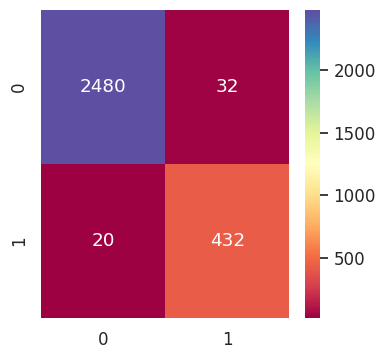

Accuracy: 0.9825
Precision: 0.931
Recall: 0.9558


In [100]:
model_knn = KNeighborsClassifier(n_neighbors=5)
knn_pipeline = make_pipeline(column_transformer, minmax_scaler, over, under, pca, model_knn)
knn_pipeline.fit(X_train, y_train)

y_pred = knn_pipeline.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(knn_pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=1)

print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

cm_knn = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_knn,  cmap = 'Spectral',  annot=True, fmt='d')
plt.show()

accuracy = round(accuracy_score(y_test, y_pred), 4)
precision = round(precision_score(y_test, y_pred),4)
recall = round(recall_score(y_test, y_pred),4)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}')